In [15]:
from __future__ import print_function

from random import shuffle

import numpy as np
import tensorflow as tf
import os
import vggish_input
import vggish_params
import vggish_slim
from pydub import AudioSegment
from audioModel import predict, train
from pydub import AudioSegment, generators
import IPython.display as ipd
from IPython.core.display import display, HTML

from audioInput import getLaughTracks, getNoise, processWavFile

from audioDisplay import displayAudioWithPredictions, displayWaveform, printResults
import random
from audioUtils import downloadYtAndPrepareAudio
from audioTrain import trainAndSaveAndPredict, trainForNoise

slim = tf.contrib.slim
        
def predictAudio(path, model_name, number_of_classes = 2):
    preds = predict(model_name, number_of_classes, processWavFile(path, log=False))
    displayWaveform(path)
    displayAudioWithPredictions(path, preds)    
    return preds
    
def download(id):
    downloadYtAndPrepareAudio(id, 'data', stripSilence=False)
    
def getGenerator(generator, seconds):    
    audio = AudioSegment.empty()
    for i in range(seconds):
        audio = audio + generator().to_audio_segment()
    return audio
        
def buildNoise(path, seconds = 1):
    !rm $path
    SAMPLE_RATE = 44100
    
    def curriedSine():
        return generators.Sine(440)
    data = getGenerator(curriedSine, seconds).append(getGenerator(generators.WhiteNoise, seconds))
    audio = AudioSegment(data.get_array_of_samples(), sample_width=2, channels=1, frame_rate=44100)
    audio.export(path, format='wav')
    display(ipd.Audio(path))    

In [16]:
#trainForNoise(number_of_samples=1, epochs=1)

In [17]:
buildNoise('data/noise.wav', 3)

number of classes 3
loading ./model/noise_100_11-100/model
INFO:tensorflow:Restoring parameters from ./vggish_model.ckpt
INFO:tensorflow:Restoring parameters from ./model/noise_100_11-100/model


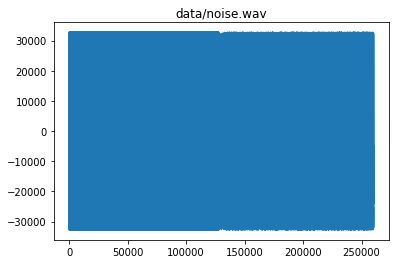

0.0,0.48,0.96,1.44,1.92,2.4
1,1,1,2,2,2


[[0.3735742  0.46824023 0.45345122]
 [0.3719063  0.46952066 0.45484728]
 [0.37840876 0.4719391  0.4582426 ]
 [0.5119353  0.5202052  0.55981994]
 [0.5210567  0.49819514 0.5702004 ]
 [0.5154795  0.49729165 0.5744155 ]]


In [20]:
preds = predictAudio('data/noise.wav', 'noise_100_11-100', number_of_classes = 3)
print(preds)

In [21]:
print(printResults(preds))

[1 1 1 2 2 2]
